# Ejercicio Pair `RED ELÉCTRICA`

https://books.adalab.es/materiales-data-analytics-full-time/modulo-2-extraer-informacion-de-la-web-y-bases-de-datos/lecciones/modulo-2-leccion-01-00-apis/modulo-2-leccion-01-apis

`Enunciado` - Obtener datos energéticos usando la API de Red Eléctrica.

`Descripción`: La empresa para la que trabajamos dispone de una base de datos que contiene información sobre el número de personas censadas en las distintas Comunidades Autónomas españolas desde 1998 hasta 2022. El objetivo es enriquecer estos datos con información sobre la generación de energía renovable y no renovable, utilizando la API de REData, la cual proporciona información sobre el mercado energético en España. Puedes encontrar la documentación de la API aquí.

`Extracción de Datos a Nivel Nacional`:

1. Extraer datos de generación de energía renovable y no renovable a nivel nacional desde el 1 de enero de 2011 hasta el 31 de diciembre de 2022. La información debe ser recopilada a nivel mensual.

2. Transformar los datos para incluir una columna nueva que identifique si la energía es renovable o no renovable.

3. Almacenar los datos en un DataFrame con la siguiente estructura:

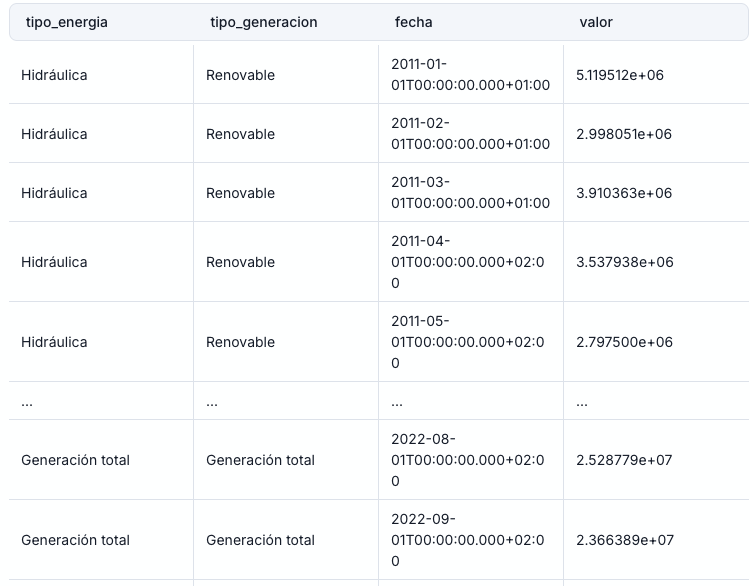

In [94]:
# Uso de API's
# -----------------------------------------------------------------------
import requests

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [ ]:
def llamar_api(url):
    """
    Realiza una llamada a una API utilizando la URL proporcionada.

    Parameters:
    -----------
    url (str): La URL de la API que se va a llamar.

    Returns:
    --------
    dict or None: Un diimport pandas imimimpoffffyimpggggffffmimmimpimccionario con los datos de respuesta de la API si la llamada fue exitosa (código de estado 200).
                  None si la llamada falló o no se pudo autenticar correctamente.
    """
    
    llamada = requests.get(url)  

    print(f"La llamada a la API nos ha dado una respuesta de tipo: {llamada.status_code}")  

    if llamada.status_code != 200:  
        print(f"El motivo por el que la llamada falló es {llamada.reason}") 
    else:
        return llamada.json()  

📌 Lo que tenemos que buscar:
- `tipo_energia`: hidráulica, generación total
- `tipo_generacion`: ej. renovable, generación total.
- `fecha`: ej. 2011-01-01T00:00:00.000+01:00
- `valor`: ej.5.119512e+06


In [96]:
url_re = "https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2011-12-31T23:59&time_trunc=month"
# lo hacemos anual porque la API de RedElectrica sólo nos permite sacar 1 año.

In [97]:
resultado_re = llamar_api(url_re)

La llamada a la API nos ha dado una respuesta de tipo: 200


📌 Lo que tenemos que buscar:
- `tipo_energia`: ✅
- `tipo_generacion`: ✅
- `fecha`: ✅ ej. 2011-01-01T00:00:00.000+01:00
- `valor`: ✅

In [144]:
#OJO! seguimos sólo en 2011.

#en primer lugar, monto mi diccionario vacío conforme a las instrucciones:

datos_red_electrica = []


#hemos identificado, que dentro de un bucle for y dentro de la API, 
# podemos llegar a los siguientes datos:

for elemento in resultado_re['included']:
    p = {
        'tipo_energia': elemento['type'], 
        'tipo_generacion': elemento['attributes']['type'], 
        'fecha': elemento['attributes']['values'][0]['datetime'], 
        'valor': elemento['attributes']['values'][0]['value']
        }
    
    datos_red_electrica.append(p)

datos_red_electrica

[{'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 5119512.38},
 {'tipo_energia': 'Nuclear',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 4706500.878},
 {'tipo_energia': 'Carbón',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 2303087.707},
 {'tipo_energia': 'Fuel + Gas',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': -751.17},
 {'tipo_energia': 'Motores diésel',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 303538.093},
 {'tipo_energia': 'Turbina de gas',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 51506.443},
 {'tipo_energia': 'Turbina de vapor',
  'tipo_generacion': 'No-Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 239152.229},
 {'tipo_energia': 'Ciclo combinado',
  

In [108]:
#Los datos anteriores son SOLO sobre el 2011, ahora necesito también, meter los del resto de años que me han pedido:
#Tendremos que sacar la API de todos los años con un bucle for y un range:

for año in range(2011, 2023): #hay que incluir el 2022, por eso hemos puesto hasta 2023.
    url_re_generica = f"https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date={año}-01-01T00:00&end_date={año}-12-31T23:59&time_trunc=month"
    print(f"Para el año {año}: {url_re_generica}")


Para el año 2011: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2011-12-31T23:59&time_trunc=month
Para el año 2012: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2012-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month
Para el año 2013: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2013-01-01T00:00&end_date=2013-12-31T23:59&time_trunc=month
Para el año 2014: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2014-01-01T00:00&end_date=2014-12-31T23:59&time_trunc=month
Para el año 2015: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2015-01-01T00:00&end_date=2015-12-31T23:59&time_trunc=month
Para el año 2016: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2016-01-01T00:00&end_date=2016-12-31T23:59&time_trunc=month
Para el año 2017: https://apidatos.ree.es/es/datos/generacion/estructu

In [206]:
json_2011_a_2022 = []

for año in range(2011, 2023): 
    
    url_re_generica = f"https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date={año}-01-01T00:00&end_date={año}-12-31T23:59&time_trunc=month"
    print(f"Para el año {año}: {url_re_generica}")
    
    llamada = requests.get(url_re_generica)
    print(f"La llamada a la API nos ha dado una respuesta de tipo: {llamada.status_code}")  

    if llamada.status_code != 200:
        print(f"El motivo por el que la llamada falló es {llamada.reason}")
    else:
        json_2011_a_2022.append(llamada.json())

json_2011_a_2022


Para el año 2011: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2011-01-01T00:00&end_date=2011-12-31T23:59&time_trunc=month
La llamada a la API nos ha dado una respuesta de tipo: 200
Para el año 2012: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2012-01-01T00:00&end_date=2012-12-31T23:59&time_trunc=month
La llamada a la API nos ha dado una respuesta de tipo: 200
Para el año 2013: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2013-01-01T00:00&end_date=2013-12-31T23:59&time_trunc=month
La llamada a la API nos ha dado una respuesta de tipo: 200
Para el año 2014: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2014-01-01T00:00&end_date=2014-12-31T23:59&time_trunc=month
La llamada a la API nos ha dado una respuesta de tipo: 200
Para el año 2015: https://apidatos.ree.es/es/datos/generacion/estructura-generacion?start_date=2015-01-01T00:00&end_date=2015-12-31T23:59&time_t

[{'data': {'type': 'Generación por tecnología',
   'id': 'gen1',
   'attributes': {'title': 'Generación por tecnología',
    'last-update': '2019-06-12T15:32:24.000+02:00',
    'description': None},
   'meta': {'cache-control': {'cache': 'HIT',
     'expireAt': '2025-03-21T10:08:34'}}},
  'included': [{'type': 'Hidráulica',
    'id': '10288',
    'groupId': '1',
    'attributes': {'title': 'Hidráulica',
     'description': None,
     'color': '#0090d1',
     'type': 'Renovable',
     'magnitude': None,
     'composite': False,
     'last-update': '2019-06-12T15:32:24.000+02:00',
     'values': [{'value': 5119512.38,
       'percentage': 0.19976265684687228,
       'datetime': '2011-01-01T00:00:00.000+01:00'},
      {'value': 2998051.279,
       'percentage': 0.13054077867742991,
       'datetime': '2011-02-01T00:00:00.000+01:00'},
      {'value': 3910363.276,
       'percentage': 0.15741784652381913,
       'datetime': '2011-03-01T00:00:00.000+01:00'},
      {'value': 3537937.995,
    

In [207]:
json_2011_a_2022[0].keys()

dict_keys(['data', 'included'])

In [209]:
json_2011_a_2022[0]

{'data': {'type': 'Generación por tecnología',
  'id': 'gen1',
  'attributes': {'title': 'Generación por tecnología',
   'last-update': '2019-06-12T15:32:24.000+02:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2025-03-21T10:08:34'}}},
 'included': [{'type': 'Hidráulica',
   'id': '10288',
   'groupId': '1',
   'attributes': {'title': 'Hidráulica',
    'description': None,
    'color': '#0090d1',
    'type': 'Renovable',
    'magnitude': None,
    'composite': False,
    'last-update': '2019-06-12T15:32:24.000+02:00',
    'values': [{'value': 5119512.38,
      'percentage': 0.19976265684687228,
      'datetime': '2011-01-01T00:00:00.000+01:00'},
     {'value': 2998051.279,
      'percentage': 0.13054077867742991,
      'datetime': '2011-02-01T00:00:00.000+01:00'},
     {'value': 3910363.276,
      'percentage': 0.15741784652381913,
      'datetime': '2011-03-01T00:00:00.000+01:00'},
     {'value': 3537937.995,
      'percentage': 0.164677860

In [210]:
for item in json_2011_a_2022:
    for elemento in item['included']:
        print(elemento['type'])
        break
    break       #✅ hemos accedido satisfactoriamente al elemento hidráulica.
    

Hidráulica


In [148]:
for item in json_2011_a_2022:
    for elemento in item['included']:
        print(elemento['attributes']['type'])
        break
    break       #✅ hemos accedido satisfactoriamente al elemento renovable.

Renovable


In [149]:
for item in json_2011_a_2022:
    for elemento in item['included']: 
        print(elemento['attributes']['values'][0]['datetime'])
        break
    break       #✅ hemos accedido satisfactoriamente al elemento fecha mes 01.

2011-01-01T00:00:00.000+01:00


In [159]:
for item in json_2011_a_2022:
    for elemento in item['included']:
        for num in range(0, (len(elemento['attributes']['values']) + 1)):
            print(elemento['attributes']['values'][num]['datetime'])

TypeError: string indices must be integers

In [212]:
#ahora vamos a extractar los datos pero para todo el periodo 2011-2022:

datos_red_electrica_2011_a_2022 = []

for item in json_2011_a_2022:
    for elemento in item['included']:
        for num in range(len(elemento['attributes']['values']) + 1):
            p = {
                'tipo_energia': elemento['type'], 
                'tipo_generacion': elemento['attributes']['type'], 
                'fecha': elemento['attributes']['values'][num]['datetime'], 
                'valor': elemento['attributes']['values'][num]['value']
                }
            
            datos_red_electrica_2011_a_2022.append(p)

datos_red_electrica_2011_a_2022

IndexError: list index out of range

In [214]:
datos_red_electrica_2011_a_2022

[{'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-01-01T00:00:00.000+01:00',
  'valor': 5119512.38},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-02-01T00:00:00.000+01:00',
  'valor': 2998051.279},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-03-01T00:00:00.000+01:00',
  'valor': 3910363.276},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-04-01T00:00:00.000+02:00',
  'valor': 3537937.995},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-05-01T00:00:00.000+02:00',
  'valor': 2797500.027},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-06-01T00:00:00.000+02:00',
  'valor': 2070305.344},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Renovable',
  'fecha': '2011-07-01T00:00:00.000+02:00',
  'valor': 1661925.007},
 {'tipo_energia': 'Hidráulica',
  'tipo_generacion': 'Re